In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv('../data/osstate/extracted/states_2022-01-03-01.csv.gz', compression='gzip')
df.head()

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact
0,1641171600,505d14,49.112869,4.659964,225.087328,16.736873,0.00000,CAT423,False,False,False,4071.0,11582.40,11521.44,1.641172e+09,1.641172e+09
1,1641171610,06a102,24.988403,54.953302,317.015236,78.106553,4.55168,QTR818,False,False,False,NaN,11087.10,11498.58,1.641172e+09,1.641172e+09
2,1641171610,3c1ffa,NaN,NaN,NaN,NaN,NaN,TEST1234,False,False,False,1353.0,7696.20,NaN,NaN,1.641172e+09
3,1641171610,7c391f,-30.978104,116.786876,130.641431,19.077091,-0.32512,LKH,False,False,False,4032.0,6957.06,7353.30,1.641172e+09,1.641172e+09
4,1641171610,a2992c,37.083069,-98.140460,278.713776,112.920862,0.32512,LJY267,False,False,False,6652.0,13106.40,13182.60,1.641172e+09,1.641172e+09


In [4]:
# add an ident column by concatenating df['callsign'] and df['icao24']
df['ident'] = (df['callsign'].str.strip()+'_'+df['icao24'].str.strip())
# add a column rtime that is df['time'] - df['time'].min()
df['rtime'] = df['time'] - df['time'].min()
df.head()

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact,ident,rtime
0,1641171600,505d14,49.112869,4.659964,225.087328,16.736873,0.00000,CAT423,False,False,False,4071.0,11582.40,11521.44,1.641172e+09,1.641172e+09,CAT423_505d14,0
1,1641171610,06a102,24.988403,54.953302,317.015236,78.106553,4.55168,QTR818,False,False,False,NaN,11087.10,11498.58,1.641172e+09,1.641172e+09,QTR818_06a102,10
2,1641171610,3c1ffa,NaN,NaN,NaN,NaN,NaN,TEST1234,False,False,False,1353.0,7696.20,NaN,NaN,1.641172e+09,TEST1234_3c1ffa,10
3,1641171610,7c391f,-30.978104,116.786876,130.641431,19.077091,-0.32512,LKH,False,False,False,4032.0,6957.06,7353.30,1.641172e+09,1.641172e+09,LKH_7c391f,10
4,1641171610,a2992c,37.083069,-98.140460,278.713776,112.920862,0.32512,LJY267,False,False,False,6652.0,13106.40,13182.60,1.641172e+09,1.641172e+09,LJY267_a2992c,10


In [5]:
# Drop the columns we don't need
df.drop(columns=['onground', 'alert', 'spi', 'squawk'], inplace=True)

In [6]:
idents = df['ident'].unique()
print('Number of unique idents:', len(idents))

Number of unique idents: 9442


## One aircraft

In [7]:
# Get the first ident
ident = 'UAL672_a94b29' # idents[3]
df_ident = df[df['ident'] == ident]
df_ident.head()

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,baroaltitude,geoaltitude,lastposupdate,lastcontact,ident,rtime
333,1641171610,a94b29,40.071328,-95.825126,268.056919,90.879713,0.00000,UAL672,10058.40,10027.92,1.641172e+09,1.641172e+09,UAL672_a94b29,10
6302,1641171620,a94b29,40.070956,-95.793728,268.571303,90.878027,5.52704,UAL672,10088.88,10050.78,1.641172e+09,1.641172e+09,UAL672_a94b29,20
13711,1641171630,a94b29,40.070584,-95.761455,268.056919,90.879713,4.55168,UAL672,10149.84,10111.74,1.641172e+09,1.641172e+09,UAL672_a94b29,30
14691,1641171640,a94b29,40.070211,-95.730369,268.056919,90.879713,4.87680,UAL672,10195.56,10157.46,1.641172e+09,1.641172e+09,UAL672_a94b29,40
21101,1641171650,a94b29,40.069839,-95.699646,268.056919,90.879713,4.87680,UAL672,10241.28,10203.18,1.641172e+09,1.641172e+09,UAL672_a94b29,50


In [8]:
import matplotlib.pyplot as plt
from geo.drift_compensation import get_track_drift_rate

Text(0.5, 1.0, 'Heading of UAL672_a94b29')

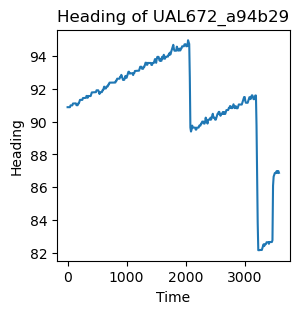

In [9]:
# Plot the heading (actually flight track) of the aircraft with time
rlastposupdate = df_ident['lastposupdate'].values - df_ident['lastposupdate'].min()
hdg = df_ident['heading'].values
vel = df_ident['velocity'].values / 1000 # km/s
lat = df_ident['lat'].values
lon = df_ident['lon'].values
alt = df_ident['geoaltitude'].values
vrate = df_ident['vertrate'].values
plt.figure(figsize=(3,3))
plt.plot(rlastposupdate, hdg)
plt.xlabel('Time')
plt.ylabel('Heading')
plt.title(f'Heading of {ident}')

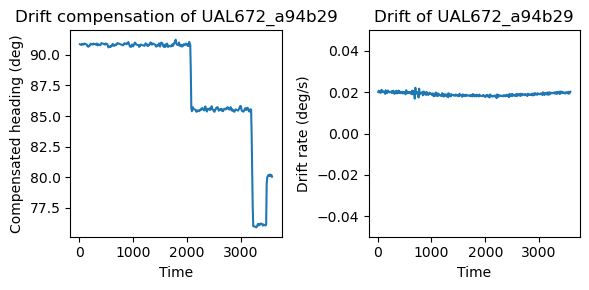

In [10]:
# Compute the drift compensation
track_drift = np.zeros_like(hdg)
cumul_drift = 0
hdg_compensated = np.zeros_like(hdg)
for i in range(1, len(hdg)):
    # We will use the last time's value to compensate the drift for this time
    track_drift[i] = get_track_drift_rate(lat[i-1], lon[i-1], hdg[i-1]) * vel[i-1] * (rlastposupdate[i] - rlastposupdate[i-1])
    if np.abs(track_drift[i]) > 1:
        print(f'lat: {lat[i-1]}, lon: {lon[i-1]}, hdg: {hdg[i-1]}, vel: {vel[i-1]}, time: {rlastposupdate[i]}')
        print(f'drift: {track_drift[i]}')
        print(f'x: {get_track_drift_rate(lat[i-1], lon[i-1], hdg[i-1])}')
    cumul_drift += track_drift[i]
    hdg_compensated[i] = (hdg[i] - cumul_drift) % 360


# Plot the drift compensation
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.plot(rlastposupdate[1:], hdg_compensated[1:])
plt.xlabel('Time')
plt.ylabel('Compensated heading (deg)')
plt.title(f'Drift compensation of {ident}')

plt.subplot(1,2,2)
plt.plot(rlastposupdate[1:], track_drift[1:])
plt.xlabel('Time')
plt.ylabel('Drift rate (deg/s)')
plt.title(f'Drift of {ident}')
plt.ylim(-0.05, 0.05)

plt.tight_layout() 

In [11]:
def take_off_detection(alt: np.ndarray, thr: float = 500) -> int:
    """
    Detects the time step when the aircraft takes off based on altitude data.

    Parameters:
    alt (np.ndarray): Array of altitude values.
    thr (float): Altitude threshold for detecting take-off. Default is 500.

    Returns:
    int: The time step when the aircraft takes off. Returns -1 if no take-off is detected.
    """

    t_above_thr = np.where(alt > thr, 1, 0) # Find the first time the altitude is above the threshold
    t_above_thr_diff = np.diff(t_above_thr) # Find the difference between consecutive time steps when the altitude is above the threshold
    if len(t_above_thr) == 0:
        return -1 # The aircraft never goes above the threshold so it is on the ground and this is not a take-off
    # Take off is the moment when the aircraft goes above the threshold 
    t_takeoff = np.where(t_above_thr_diff > 0.5)[0]
    if len(t_takeoff) == 0:
        return -1
    return t_takeoff[0] + 1 # Return the time step when the aircraft takes off

def landing_detection(alt: np.ndarray, thr: float = 500) -> int:
    """
    Detects the time step when the aircraft lands based on altitude data.

    Parameters:
    alt (np.ndarray): Array of altitude values.
    thr (float): Altitude threshold for detecting take-off. Default is 500.

    Returns:
    int: The time step when the aircraft lands. Returns -1 if no landing is detected.
    """

    t_above_thr = np.where(alt > thr, 1, 0) # Find the first time the altitude is above the threshold
    t_above_thr_diff = np.diff(t_above_thr) # Find the difference between consecutive time steps when the altitude is above the threshold
    if len(t_above_thr) == 0:
        return -1 # The aircraft never goes above the threshold so it is on the ground and this is not a take-off
    # Take off is the moment when the aircraft goes above the threshold 
    t_landing = np.where(t_above_thr_diff < -0.5)[0]
    if len(t_landing) == 0:
        return -1
    return t_landing[0] + 1 # Return the time step when the aircraft takes off

# Test the functions
print(take_off_detection(np.array([700, 600, 500, 400, 200, 100, 0])))
print(landing_detection(np.array([700, 600, 500, 400, 200, 100, 0])))

-1
2


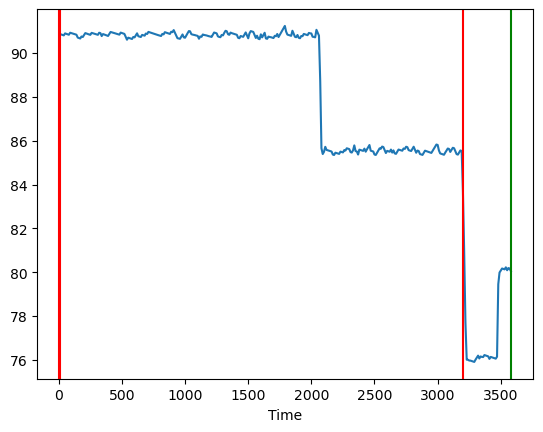

In [12]:
# Get changepoints in the heading
from changepy import pelt
from changepy.costs import normal_mean

# Get the changepoints
changepoints = pelt(normal_mean(hdg_compensated, 1), len(hdg_compensated))

# Write down the turning points
tp_lat = []
tp_lon = []
tp_time = []

# Detection of takeoffs
t_takeoff = take_off_detection(alt)
t_landing = landing_detection(alt)

# One final changepoint at the end of the flight or when the aircraft lands
if t_landing != -1:
    changepoints = np.append(changepoints, t_landing)
    # Delete all the changepoints after the aircraft landed
    changepoints = changepoints[changepoints <= t_landing] 
    flight_not_landed_yet = False
else:
    changepoints = np.append(changepoints, len(hdg_compensated)-1)

if t_takeoff != -1:
    changepoints = np.insert(changepoints, 0, t_takeoff)
    # Delete all the changepoints before the aircraft took off
    changepoints = changepoints[changepoints >= t_takeoff]

for i in range(len(changepoints)-1):
    tp_lat.append(lat[changepoints[i]])
    tp_lon.append(lon[changepoints[i]])
    tp_time.append(rlastposupdate[changepoints[i]])
    
    # if i == 0:
    #     tp_from_hdg.append(np.mean(hdg_compensated[:changepoints[i]]))
    # else:
    #     tp_from_hdg.append(np.mean(hdg_compensated[changepoints[i-1]:changepoints[i]]))
    # tp_to_hdg.append(np.mean(hdg_compensated[changepoints[i]:changepoints[i+1]]))

# Plot the changepoints 
plt.plot(rlastposupdate[1:], hdg_compensated[1:])
for i, cp in enumerate(changepoints):
    if i == len(changepoints)-1:
        plt.axvline(x=rlastposupdate[cp], color='g')
    else:
        plt.axvline(x=rlastposupdate[cp], color='r')
    plt.xlabel('Time')

0 0.0 9.926999807357788
Merging 0 and 1
0 4.963499903678894 3200.1009998321533


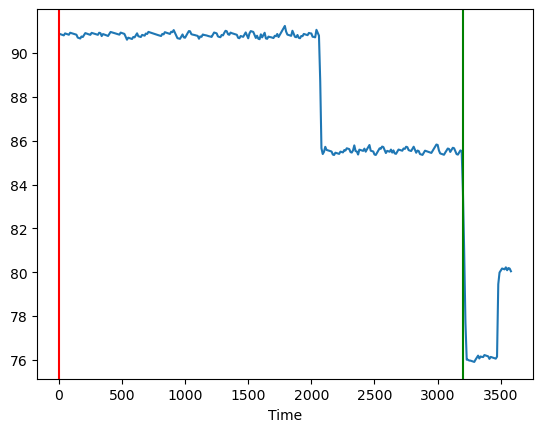

In [13]:
# Merge changepoints that are too close to each other
i = 0
while i < len(tp_lat)-1:
    print(i, tp_time[i], tp_time[i+1])
    if (tp_time[i+1] - tp_time[i]) < 60:
        print(f'Merging {i} and {i+1}')
        tp_lat[i] = (tp_lat[i] + tp_lat[i+1]) / 2
        tp_lon[i] = (tp_lon[i] + tp_lon[i+1]) / 2
        tp_time[i] = (tp_time[i] + tp_time[i+1]) / 2
        # tp_from_hdg[i] = (tp_from_hdg[i] + tp_from_hdg[i+1]) / 2
        # tp_to_hdg[i] = (tp_to_hdg[i] + tp_to_hdg[i+1]) / 2
        tp_lat.pop(i+1)
        tp_lon.pop(i+1)
        tp_time.pop(i+1)
        # tp_from_hdg.pop(i+1)
        # tp_to_hdg.pop(i+1)
    else:
        i += 1

# Add takeoff and landing to the changepoints
if t_takeoff != -1:
    if len(tp_time) > 0:
        if tp_time[0] > rlastposupdate[t_takeoff]:
            print('Adding takeoff changepoint')
            tp_lat.insert(0, lat[t_takeoff])
            tp_lon.insert(0, lon[t_takeoff])
            tp_time.insert(0, rlastposupdate[t_takeoff])
    # tp_from_hdg.insert(0, hdg_compensated[0])
    # tp_to_hdg.insert(0, hdg_compensated[t_takeoff])

if t_landing != -1:
    if len(tp_time) > 0:
        if tp_time[-1] < rlastposupdate[t_landing]:
            print('Adding landing changepoint')
            tp_lat.append(lat[t_landing])
            tp_lon.append(lon[t_landing])
            tp_time.append(rlastposupdate[t_landing])
    # tp_from_hdg.append(hdg_compensated[t_landing])
    # tp_to_hdg.append(hdg_compensated[-1])

# Plot the changepoints 
plt.plot(rlastposupdate[1:], hdg_compensated[1:])
for i, cp in enumerate(tp_time):
    if i == len(tp_time)-1:
        plt.axvline(x=tp_time[i], color='g')
    else:
        plt.axvline(x=tp_time[i], color='r')
    plt.xlabel('Time')

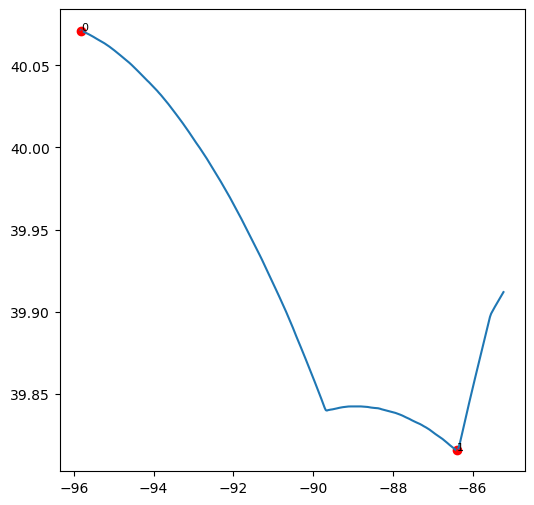

In [14]:
# Reconstruct the approximate flight path
plt.figure(figsize=(6,6))
plt.plot(lon, lat)
plt.plot(tp_lon, tp_lat, 'ro', markersize=1)
for i in range(len(tp_lat)):
   plt.scatter(tp_lon[i], tp_lat[i], color='r')
   plt.text(tp_lon[i], tp_lat[i], f'{i}', fontsize=8)

We actually do not care about the heading because we only rely on the the flight track to derive changepoints. Afterwards, everything is connected through great circle path.

In [15]:
tp_alt

NameError: name 'tp_alt' is not defined

## Altitude changepoint

Text(0.5, 1.0, 'Altitude of VOZ846_7c7ab4')

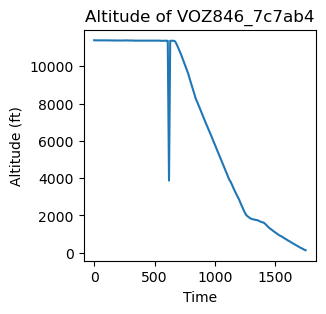

In [ ]:
plt.figure(figsize=(3,3))
plt.plot(rlastposupdate, alt)
plt.xlabel('Time')
plt.ylabel('Altitude (ft)')
plt.title(f'Altitude of {ident}')

Text(0.5, 1.0, 'Altitude of VOZ846_7c7ab4')

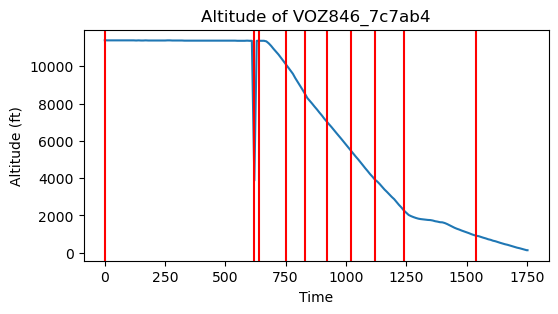

In [ ]:
# Detect changepoints in altitude
from changepy.costs import normal_mean
from changepy import pelt

# Get the changepoints
changepoints = pelt(normal_mean(alt, 1000), len(alt))

# Plot the changepoints
plt.figure(figsize=(6,3))
plt.plot(rlastposupdate, alt)
for cp in changepoints:
    plt.axvline(x=rlastposupdate[cp], color='r')
plt.xlabel('Time')
plt.ylabel('Altitude (ft)')
plt.title(f'Altitude of {ident}')


0 0.0 620.2439999580383
1 620.2439999580383 640.2039999961853
Merging 1 and 2
1 630.2239999771118 750.1369998455048
Merging 1 and 2
1 690.1804999113083 830.1689999103546
2 830.1689999103546 920.2469999790192
Merging 2 and 3
2 875.2079999446869 1020.0349998474121
3 1020.0349998474121 1120.242999792099
Merging 3 and 4
3 1070.1389998197556 1239.8929998874664


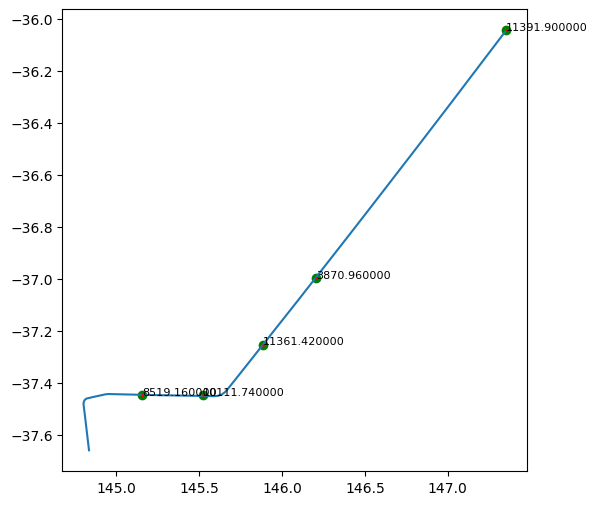

In [ ]:
dp_time = []
dp_lat = []
dp_lon = []
dp_alt = []

for i in range(len(changepoints)-1):
    dp_time.append(rlastposupdate[changepoints[i]])
    dp_lat.append(lat[changepoints[i]])
    dp_lon.append(lon[changepoints[i]])
    dp_alt.append(alt[changepoints[i]])

# Merge changepoints that are too close to each other
i = 0
while i < len(dp_lat)-1:
    print(i, dp_time[i], dp_time[i+1])
    if (dp_time[i+1] - dp_time[i]) < 120:
        print(f'Merging {i} and {i+1}')
        dp_lat[i] = (dp_lat[i] + dp_lat[i+1]) / 2
        dp_lon[i] = (dp_lon[i] + dp_lon[i+1]) / 2
        dp_time[i] = (dp_time[i] + dp_time[i+1]) / 2
        dp_alt[i] = (dp_alt[i] + dp_alt[i+1]) / 2
        dp_lat.pop(i+1)
        dp_lon.pop(i+1)
        dp_time.pop(i+1)
        dp_alt.pop(i+1)
    else:
        i += 1

# Plot the changepoints
plt.figure(figsize=(6,6))
plt.plot(lon, lat)
plt.plot(dp_lon, dp_lat, 'ro', markersize=1)
for i in range(len(dp_lat)):
   plt.scatter(dp_lon[i], dp_lat[i], color='g')
   plt.text(dp_lon[i], dp_lat[i], f'{alt[changepoints[i]]:2f}', fontsize=8)

# Test the library functions

In [ ]:
df_ident = df[df['ident'] == idents[6]]
df.dropna(how='any', inplace=True)

In [ ]:
df_ident.head()

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,baroaltitude,geoaltitude,lastposupdate,lastcontact,ident,rtime
6,1641182410,4ca9bb,53.002842,-14.946507,264.558798,85.985824,0.32512,EIN1TC,11285.22,11033.76,1.641182e+09,1.641182e+09,EIN1TC_4ca9bb,10
4956,1641182420,4ca9bb,53.004089,-14.906693,264.222966,87.210015,0.00000,EIN1TC,11285.22,11033.76,1.641182e+09,1.641182e+09,EIN1TC_4ca9bb,20
9555,1641182430,4ca9bb,53.005280,-14.866638,264.248506,87.098603,0.00000,EIN1TC,11285.22,11033.76,1.641182e+09,1.641182e+09,EIN1TC_4ca9bb,30
11729,1641182440,4ca9bb,53.006566,-14.828012,263.817497,86.758195,0.00000,EIN1TC,11285.22,11033.76,1.641182e+09,1.641182e+09,EIN1TC_4ca9bb,40
15732,1641182450,4ca9bb,53.007963,-14.787990,263.847089,86.646660,0.00000,EIN1TC,11277.60,11026.14,1.641182e+09,1.641182e+09,EIN1TC_4ca9bb,50


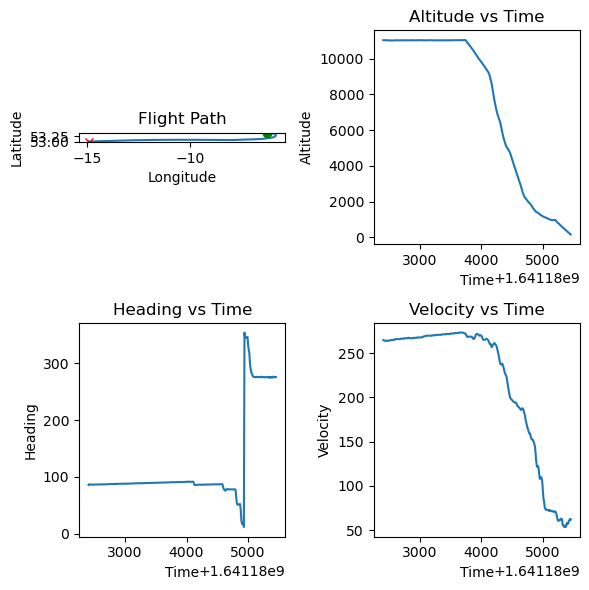

Adding landing changepoint


<Figure size 640x480 with 0 Axes>

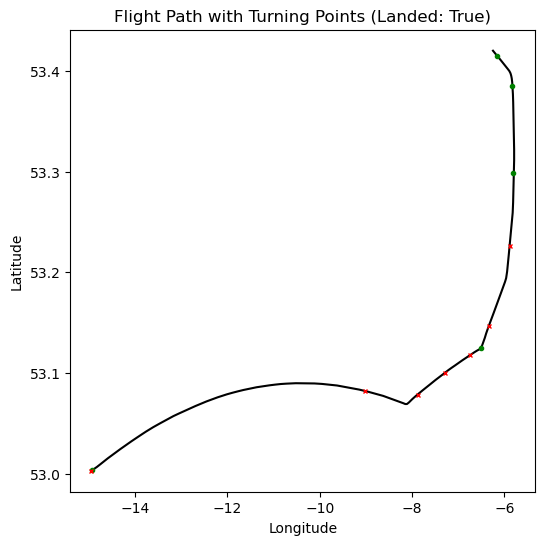

In [ ]:
from get_turn import get_turning_points, plot_changepoints, TurnAndRise
from potters import plot_df
plot_df(df_ident)

turns:TurnAndRise = get_turning_points(df_ident)
plt.figure()
plot_changepoints(turns, df_ident)


In [ ]:
turns['landed']

True